In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

In [2]:
ratings = pd.read_csv("./ratings.csv")

#### Data indexed by user and by movie

In [3]:
# Initialize dictionaries to store ratings by user and by movie
user_ratings = defaultdict(list)
movie_ratings = defaultdict(list)

# Populate dictionaries from ratings DataFrame
for row in ratings.itertuples(index=False):
    user_id = row.userId
    movie_id = row.movieId
    rating = row.rating

    user_ratings[user_id].append((movie_id, rating))
    movie_ratings[movie_id].append((user_id, rating))

#### Distribution of Ratings

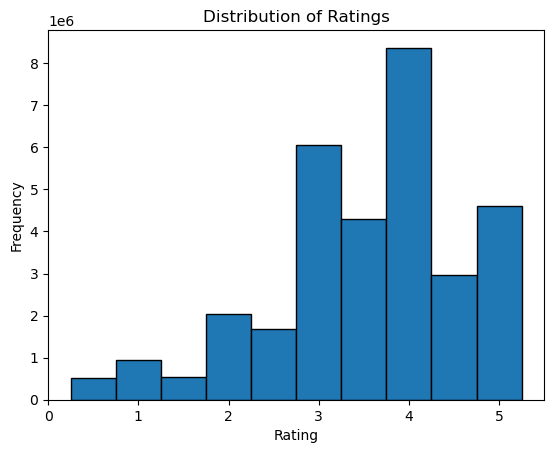

In [4]:
# Count frequency of each rating
rating_counts = Counter(ratings['rating'])
x = sorted(rating_counts.keys())
y = [rating_counts[r] for r in x]

# Plot rating distribution
plt.bar(x, y, width=0.5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

#### Number of Ratings per User

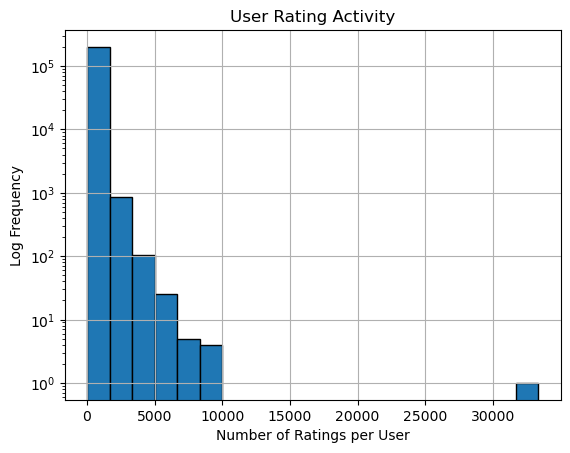

In [5]:
# Compute number of ratings per user
user_activity = [len(user_ratings[u]) for u in user_ratings]

# Plot histogram of user activity
plt.hist(user_activity, bins=20, log=True, edgecolor='black')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Log Frequency')
plt.title('User Rating Activity')
plt.grid(True)
plt.show()

#### Number of Ratings per Movie

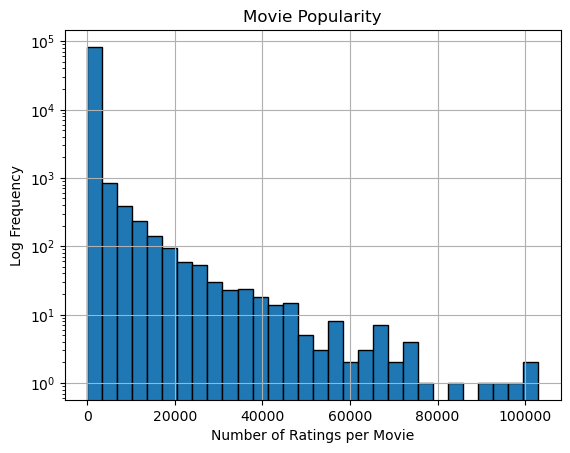

In [ ]:
# Compute number of ratings per movie
movie_popularity = [len(movie_ratings[m]) for m in movie_ratings]

# Plot histogram of movie popularity
plt.hist(movie_popularity, bins=30, log=True, edgecolor='black')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Log Frequency')
plt.title('Movie Popularity')
plt.grid(True)
plt.show()

## Power-Law Behaviour

#### Log-Log Plot of User Activity

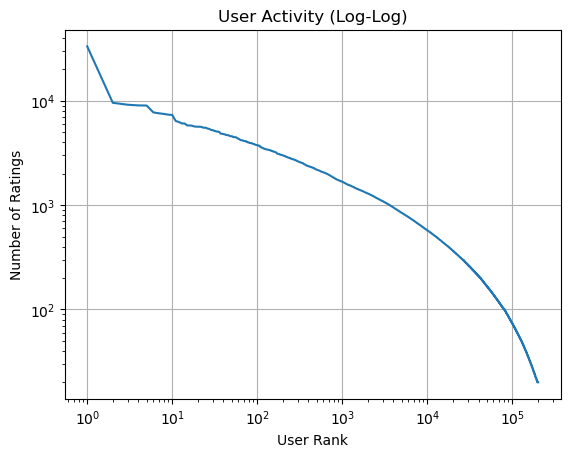

In [7]:
# Compute number of ratings per user
user_activity = [len(user_ratings[u]) for u in user_ratings]

# Sort user activity in descending order
user_activity_sorted = sorted(user_activity, reverse=True)

# Plot log-log user activity
plt.loglog(range(1, len(user_activity_sorted) + 1), user_activity_sorted)
plt.xlabel('User Rank')
plt.ylabel('Number of Ratings')
plt.title('User Activity (Log-Log)')
plt.grid(True)
plt.show()


#### Log-Log Plot of Movie Popularity

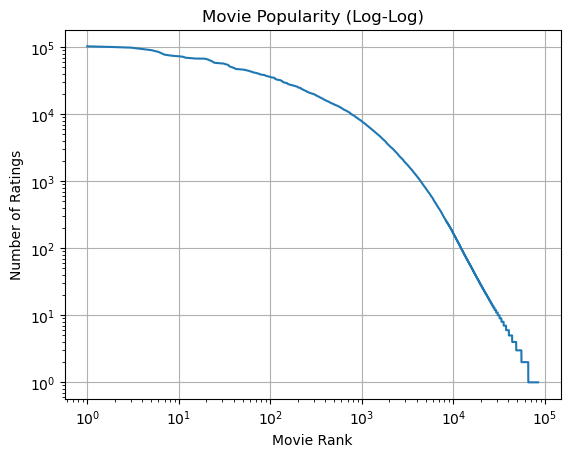

In [8]:
# Sort movie popularity in descending order
movie_popularity_sorted = sorted(movie_popularity, reverse=True)

# Plot log-log movie popularity
plt.loglog(range(1, len(movie_popularity_sorted) + 1), movie_popularity_sorted)
plt.xlabel('Movie Rank')
plt.ylabel('Number of Ratings')
plt.title('Movie Popularity (Log-Log)')
plt.grid(True)
plt.show()


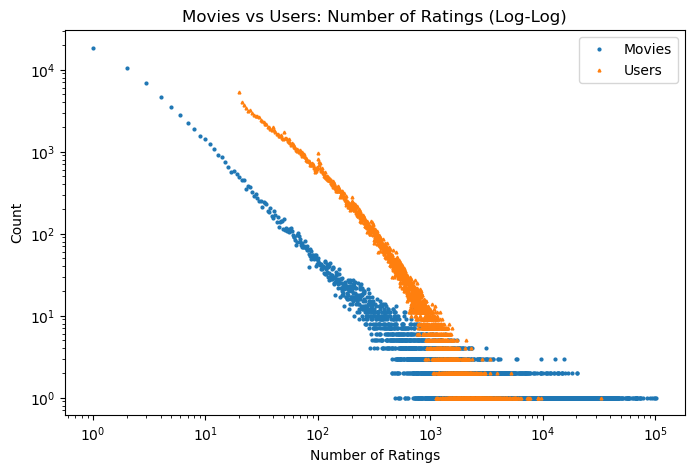

In [9]:
# Movie distribution
movies_per_rating_count = Counter(movie_popularity)
x_movies = sorted(movies_per_rating_count.keys())
y_movies = [movies_per_rating_count[r] for r in x_movies]

# User distribution
users_per_rating_count = Counter(user_activity)
x_users = sorted(users_per_rating_count.keys())
y_users = [users_per_rating_count[r] for r in x_users]

# Combined log-log plot
plt.figure(figsize=(8, 5))
plt.loglog(x_movies, y_movies, marker='o', markersize=2, linestyle='none', label='Movies')
plt.loglog(x_users, y_users, marker='^', markersize=2, linestyle='none', label='Users')

plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.title('Movies vs Users: Number of Ratings (Log-Log)')
plt.legend()
plt.show()
